### Digital Filter Design and Analysis: Implementing FIR and IIR filters in Python.
### Adaptive Filtering: Applying adaptive filtering algorithms to noise reduction.

Variant 9:
- Design an FIR filter with the following coefficients and implement it in
Python to reduce noise in a noisy sinusoidal signal.
FIR Filter Coefficients: b = {0, 1, 0}
- Design an IIR filter with the following coefficients and implement it in Python to reduce
noise in the same noisy sinusoidal signal.
IIR Filter Coefficients: b = {0.2, 0.8}, a = {1, 0.5}
- Implement an adaptive LMS filter in Python with a step size µ = 0.05 and filter length
M = 3 to reduce noise in the same noisy sinusoidal signal.

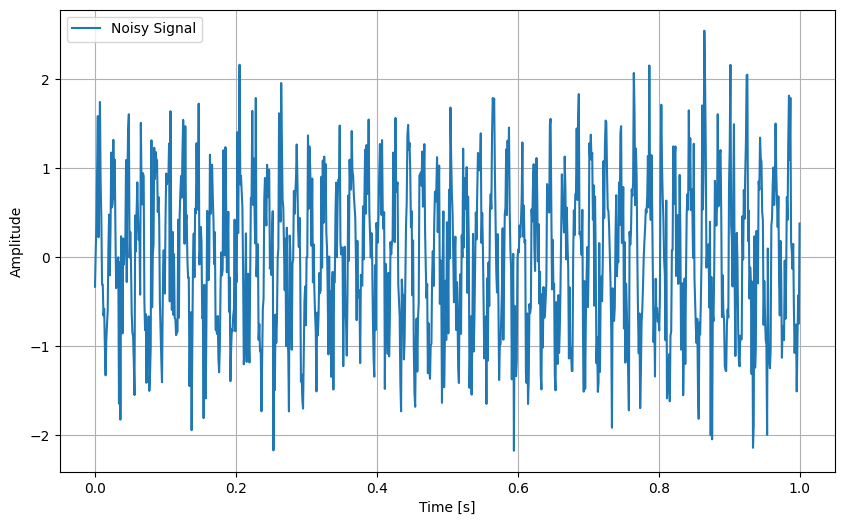

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

#Create the noisy signal -input signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.randn(len(t))  # Noisy signal

#Show the input signal
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

FIR filter with the following coefficients
FIR Filter Coefficients: b = {0, 1, 0}

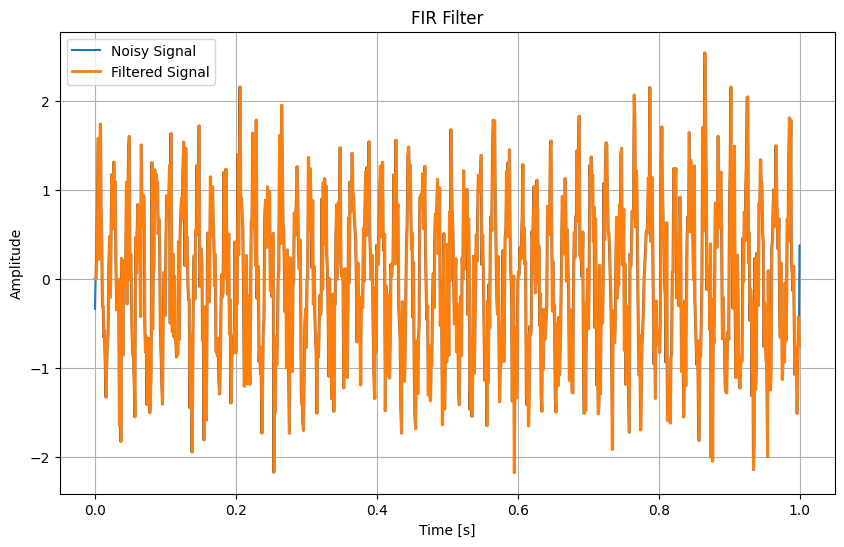

In [13]:
def fir_filter(x, b):
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

#The input signal x was created at the beginning of the notebook
b = [0, 1, 0]  # FIR coefficients - variant specific

y = fir_filter(x, b)

plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("FIR Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

IIR filter with the following coefficients.
IIR Filter Coefficients:
- b = {0.2, 0.8},
- a = {1, 0.5}

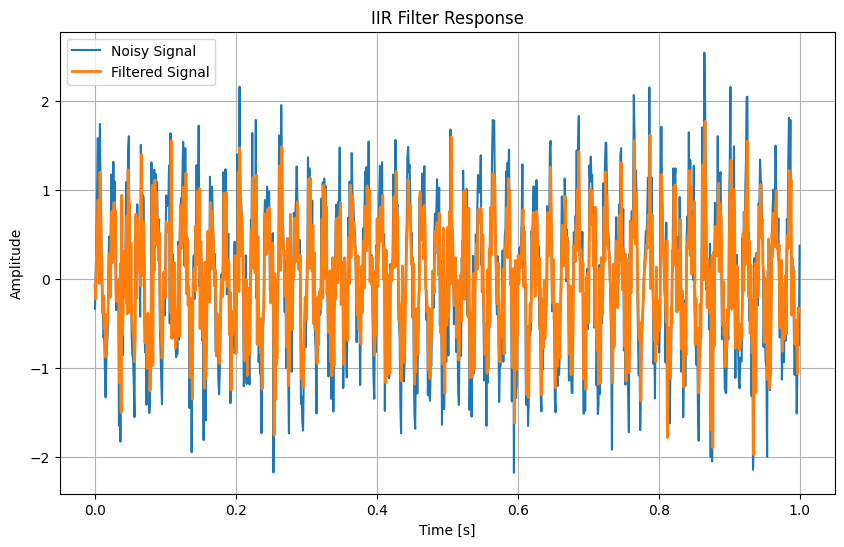

In [8]:
def iir_filter(x, b, a):
    M = len(b)  # Length of numerator coefficients (b)
    N = len(a)  # Length of denominator coefficients (a)
    y = np.zeros(len(x))  # Initialize output signal array

    # Apply filter to each sample in the input signal
    for n in range(len(x)):
        # Numerator part (feedforward)
        # Ensure we use the correct slice length for the convolution
        x_slice = x[max(0, n-M+1):n+1]  # Input signal slice
        y[n] = np.dot(b[:len(x_slice)], x_slice[::-1])  # Apply reverse convolution for numerator

        # Denominator part (feedback), skip the first sample
        if n >= 1:
            # Ensure we use the correct slice length for the feedback part
            y_slice = y[max(0, n-N+1):n]  # Output signal slice
            y[n] -= np.dot(a[1:min(N, len(y_slice)+1)], y_slice[::-1])  # Apply reverse convolution for feedback

    return y

#The input signal x was created at the beginning of the notebook

# IIR filter coefficients - variant specific
a = [1, 0.5]  # Denominator coefficients (a_0 = 1 by convention)
b = [0.2, 0.8]  # Numerator coefficients

# Apply the filter to the noisy signal
y = iir_filter(x, b, a)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("IIR Filter Response")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Adaptive LMS filter with a step size µ = 0.05 and filter length M = 3

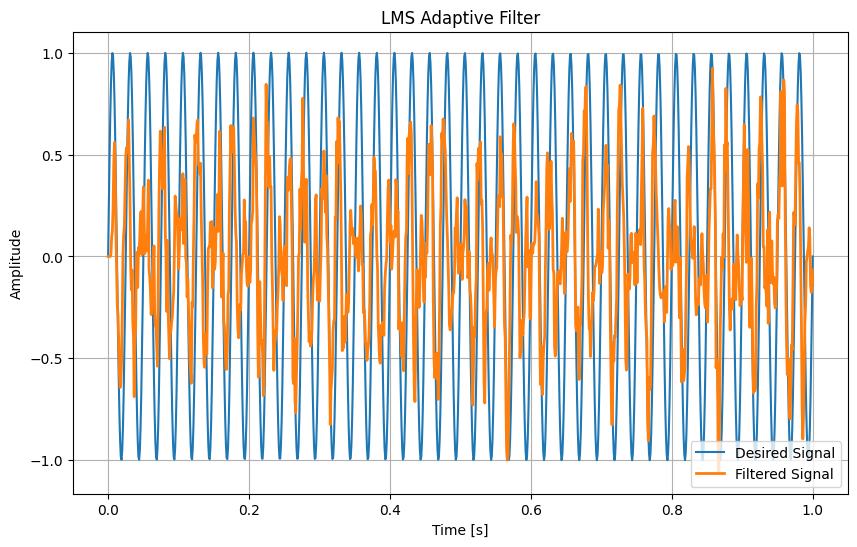

In [15]:
def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)

    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment
    
    return y, e, w

#The input signal x was created at the beginning of the notebook

d = np.sin(2 * np.pi * 40 * t)  # Desired signal

mu = 0.05  # Step size
num_taps = 3

y, e, w = lms_filter(x, d, mu, num_taps)

plt.figure(figsize=(10, 6))
plt.plot(t, d, label="Desired Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("LMS Adaptive Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

#### Conclusion

- FIR Filter (b = [0, 1, 0])
The implemented FIR filter with coefficients [0, 1, 0] functioned primarily as a unit delay rather than an effective noise reduction mechanism. This configuration simply shifted the signal by one sample without changing noise components. For effective noise reduction, FIR filters require carefully designed coefficient sets.

- IIR Filter (b = [0.2, 0.8], a = [1, 0.5])
The IIR filter implementation with coefficients b=[0.2, 0.8] and a=[1, 0.5] demonstrated better noise reduction than the implemented FIR filter. This IIR filter effectively functioned as a low-pass filter, preserving the fundamental sinusoidal component while removing higher-frequency noise.

- Adaptive LMS Filter (µ = 0.05, M = 3)
The adaptive LMS filter with step size μ=0.05 and filter length M=3 demonstrated the most flexible noise reduction capabilities. By continuously adapting its coefficients based on error minimization, this filter effectively tracked the desired signal characteristics even when noise conditions varied.